## Comments

Dear Barbara, it is good to write some comments in the Jupyter notebook so that you can remember what you did.  You insert a cell, and change it from code to mark down.
If you use # or ## at the start of a line, you will have different sized headings. 

Also, if you use two dollar symbols with an equation in the middle, you will be able to put in a latex equation. $E=mc^2$.  Double click in this cell, and you'll see how I did it.

It is good that you experimented with writing different code, but you could have stuck
closer to the examples I gave you and have had something that works more easily.  

Still, when we program, we need to follow our own intuition and try things.  So well done.



In [13]:
import numpy as np

import imageio
import cv2 as openCV
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [14]:
PIG_IMG = imageio.imread('./PIG_MR')
METADATA = PIG_IMG.meta

PLT_NAME_id = METADATA.PatientID

pxl = METADATA.Columns - 1

pxlData = np.array([px for px in range(256)])

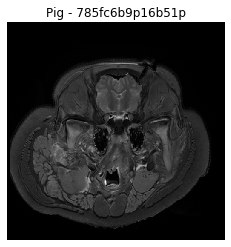

In [15]:
plt.imshow(PIG_IMG, cmap = 'gray')
plt.title('Pig - '+ PLT_NAME_id)
plt.axis('off')
plt.show()

In [16]:
pixelValues, grayLevels = np.histogram(PIG_IMG.ravel(), range(pxl))

# print(np.shape(pixelValues)) retorna um vetor

maxIntensidade = np.max(pixelValues)
minIntensidade = np.min(pixelValues)

print('max intensidade: %.0f' % maxIntensidade)
print('min intensidade: %.0f' % minIntensidade)

max intensidade: 58268
min intensidade: 0


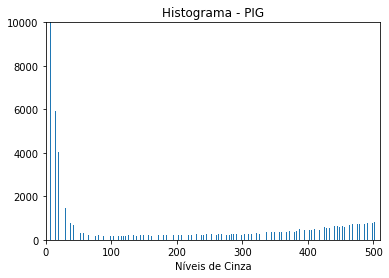

In [17]:
plt.bar(grayLevels[:-1], pixelValues, width=1, edgecolor='none')
plt.title('Histograma - PIG')
plt.xlabel('Níveis de Cinza')
plt.xlim([-0.5, pxl])
plt.ylim([0, 10000])
plt.show()

In [25]:
## SIGMOID
def sigmoid(data, omega, sigma):
    print(len(data))
    pxl = len(data)-1 # len(data) = 256 for 8-bit, we want [0,255]
    sig = np.zeros(pxl)
    # You don't need a loop, and you are looping over values 0,255 instead of over all 
    # the values of the input image. 
    # Also, vector operations are faster than loops in python.
    facSigmoid = np.exp( ( -(data - omega) /sigma ) ) 
    sig = pxl * (1/(1 + facSigmoid))
    return sig

256


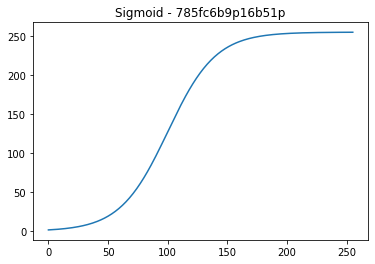

512


<function matplotlib.pyplot.show(*args, **kw)>

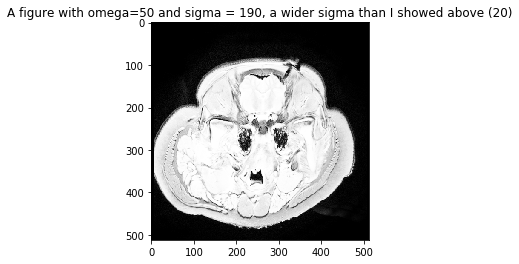

In [45]:
sigmoidPig = sigmoid(pxlData, 100, 20) # Your choice of values gave an inverted and rather strange sigmoid
# you had a negative sigma value which inverted the curve.

plt.plot(pxlData, sigmoidPig)
plt.title('Sigmoid - '+ PLT_NAME_id)
plt.show()
#notice sigmoid is centred in 100, with a relatively small range of values (in x) for 0-255 in y.

# We want to see what your sigmoid does to the image.
plt.imshow(sigmoid(PIG_IMG, 50, 190),cmap='gray')
plt.title('A figure with omega=50 and sigma = 190, a wider sigma than I showed above (20)')
plt.show

In [46]:
## TRANSFORM. NEGATIVO
imgInvert = pxl - 1 - PIG_IMG

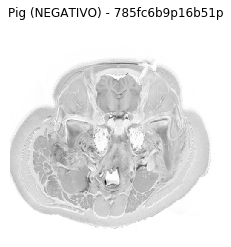

In [47]:
plt.imshow(imgInvert, cmap = 'gray')
plt.title('Pig (NEGATIVO) - '+ PLT_NAME_id)
plt.axis('off')
plt.show()

In [48]:
## TRANSFORM. NEGATIVO LOG

'''
log transform
-> s = c*log(1+r)

-> c = (L-1)/log(1+|I_max|)
'''
def logTransform(pixels, grayScale):
    maxGray = np.max(grayScale)
    return (pixels/np.log(1+ maxGray))*np.log(1+grayScale)

imgLogTransfor = logTransform(pxl, PIG_IMG)

### I liked your idea of doing a log plot.  We see the variation in gray level better over the entire plot
we can see the background details too.   It seems as if the pig was surrounded with something during
the image acquisition. 

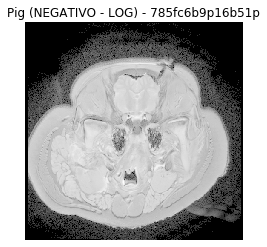

In [49]:
plt.imshow(imgLogTransfor, cmap = 'gray')
plt.title('Pig (NEGATIVO - LOG) - '+ PLT_NAME_id)
plt.axis('off')
plt.show()

In [51]:
## CORRECAO GAMMA

gamma = 1.5  # Se gamma < 1 ~ Dark ; Se gamma > 1 ~ Bright

gamma_correction=((PIG_IMG/pxl)**(1/gamma))

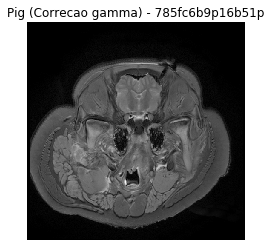

In [52]:
plt.imshow(gamma_correction, cmap = 'gray')
plt.title('Pig (Correcao gamma) - '+ PLT_NAME_id)
plt.axis('off')
plt.show()